

# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

With this project, we are going to investigate a movie a dataset. It includes wrangling, cleaning, exploring data and finally creating some questions related to the movie statistics of the world. The findings will be enriched by the data visualization.

In [2]:
import pandas as pd
import numpy as np
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### Some questions related to the movies
<ul>
    <li> Which year has the most productions?</li>
    <li> Movie counts by genres in 2015?</li>
    <li> Which actors/actress has played at which year most?</li>
    <li> Take one of the genres and investigate its population by year.</li>
</ul>

### General Properties
We start investigating out dataset by choosing the columns we are interested for our questions.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#df = pd.read_csv('tmdb-movies.csv')
df = pd.read_csv('tmdb-movies.csv', usecols=['popularity', 'original_title', 'cast', 'director', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'keywords', 'runtime'])
df.head()

popularity                original_title  \
0   32.985763                Jurassic World   
1   28.419936            Mad Max: Fury Road   
2   13.112507                     Insurgent   
3   11.173104  Star Wars: The Force Awakens   
4    9.335014                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

*  cast, genres, keywords and production_companies columns have values seperated by pipeline('|'). We should consider this situation when analyzing the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 1018.8+ KB


* Some columns has null values. We can clean them by default values. 

In [26]:
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

**>** There are 5 numerical and 7 object(string) columns

In [7]:
df.describe()

popularity       runtime    vote_count  vote_average  release_year
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000
mean       0.646441    102.070863    217.389748      5.974922   2001.322658
std        1.000185     31.381405    575.619058      0.935142     12.812941
min        0.000065      0.000000     10.000000      1.500000   1960.000000
25%        0.207583     90.000000     17.000000      5.400000   1995.000000
50%        0.383856     99.000000     38.000000      6.000000   2006.000000
75%        0.713817    111.000000    145.750000      6.600000   2011.000000
max       32.985763    900.000000   9767.000000      9.200000   2015.000000

* Average voting is around 6
* The lowest voting is 1.5
* The dataset has movies from 2001 to 2015
* The movies has at least 10 voting count, and the most 9767 voting.
* Average runtime is around 102 minutes.

In [8]:
df.shape

(10866, 12)

* The dataset has 12 columns and 10865 records(rows)

In [9]:
#The movie with the maximum popularity is
max_popularity = df['popularity'].max()
#print(max_popularity)
df[df.popularity==max_popularity]

popularity  original_title  \
0   32.985763  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   

   vote_average  release_year  
0           6.5          2015

In [10]:
df.nunique()

popularity              10814
original_title          10571
cast                    10719
director                 5067
keywords                 8804
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
dtype: int64

* The dataset has 56 distinct years
* There are 5067 direcors
* We can not say distinct numbers for keywords, genres, production_companies and cast because they have values with pipeline('|'). To analyze these fields we must explore the data

### Data Cleaning
<ul>
    <li>assign default values to null values.</li>
    <li>find duplicated rows and drop them</li>
    <li>confirm cleaned data</li>
</ul>

In [12]:
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [36]:
# fill the null values with a default value
df["cast"].fillna('No cast available',inplace=True)
df["director"].fillna('No director available',inplace=True)
df["keywords"].fillna('No keywords available',inplace=True)
df["genres"].fillna('No genres available',inplace=True)
df["production_companies"].fillna('No production company available',inplace=True)


In [37]:
#confirm that there is no null value anymore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10866 non-null object
director                10866 non-null object
keywords                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 1018.8+ KB


In [64]:
#find duplicated rows
df[df.duplicated() == True]

popularity original_title  \
2090     0.59643         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                               keywords  runtime  \
2090  martial arts|dystopia|based on video game|mart...       92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  
2090      3/20/10         110           5.0          2010

In [65]:
#drop duplicated rows
df.drop_duplicates(inplace = True)

In [66]:
#confirm duplicated rows have been cleaned
df[df.duplicated() == True]

Empty DataFrame
Columns: [popularity, original_title, cast, director, keywords, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year]
Index: []

<a id='eda'></a>
## Exploratory Data Analysis

Here are some explorations related to the dataset

* Counts of movies years are an important information for Movie database. We can investigate counts of movies by grouping them with release years

(array([  32.,   31.,   32.,    0.,   34.,   42.,    0.,   35.,   46.,
           0.,   40.,   39.,    0.,   31.,   41.,    0.,   55.,   40.,
          55.,    0.,   47.,   44.,    0.,   47.,   57.,    0.,   65.,
          57.,    0.,   78.,   82.,    0.,   81.,   80.,  105.,    0.,
         109.,  121.,    0.,  125.,  145.,    0.,  137.,  132.,    0.,
         133.,  133.,    0.,  178.,  184.,  175.,    0.,  204.,  192.,
           0.,  210.,  224.,    0.,  227.,  242.,    0.,  266.,  281.,
           0.,  307.,  364.,  408.,    0.,  438.,  496.,    0.,  533.,
         490.,    0.,  540.,  588.,    0.,  659.,  700.,  629.]),
 array([  0.    ,   0.6875,   1.375 ,   2.0625,   2.75  ,   3.4375,
          4.125 ,   4.8125,   5.5   ,   6.1875,   6.875 ,   7.5625,
          8.25  ,   8.9375,   9.625 ,  10.3125,  11.    ,  11.6875,
         12.375 ,  13.0625,  13.75  ,  14.4375,  15.125 ,  15.8125,
         16.5   ,  17.1875,  17.875 ,  18.5625,  19.25  ,  19.9375,
         20.625 ,  21.3125

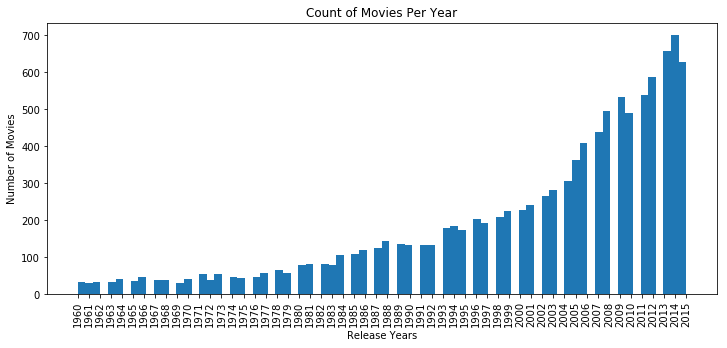

In [17]:
#Distribution of movies grouped by years
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

dfvisual = pd.DataFrame(df['release_year'])
plt.ylabel('Number of Movies')
plt.xlabel('Release Years')
plt.title('Count of Movies Per Year')
plt.xticks(rotation=90)
plt.hist(dfvisual, bins=80)

* As expected, number of movies is increasing by years. That increase are more significant after 2005. 

* Number of the movies owned by the direcories is an important information. Let's find the direcories who has the most movies

In [20]:
#The directors who have the most number of movies
df['director'].value_counts().nlargest(20)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Wes Craven           19
Barry Levinson       19
Rob Reiner           18
David Cronenberg     18
John Carpenter       18
Mike Nichols         18
Renny Harlin         17
Sidney Lumet         17
Spike Lee            17
Peter Hyams          17
Name: director, dtype: int64

* Woody Allen is the leader about number movies with 45 movies.

* Runtime of the movies is an important criteria for most of the watchers. People may consider it when they decide to watch a movie.
  Let's investigate how does runtime change by years and visualize it.

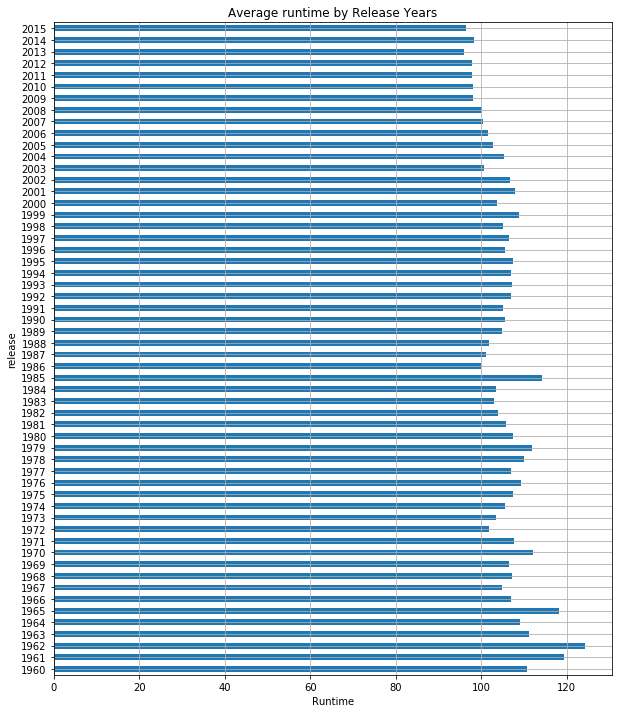

In [24]:
#Average runtime grouped by year
dfyearruntime = pd.DataFrame({'release' : df['release_year'] , 'runtime' : df['runtime']})
plt.figure(figsize=(10, 12))
plt.xlabel('Runtime')
plt.ylabel('Release Years')
plt.title('Average runtime by Release Years')
dfyearruntime.groupby('release')['runtime'].mean().plot(kind="barh", grid=True)

* Average vote grouped by year

In [122]:
df.groupby('release_year').vote_average.mean()

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.417073
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.395745
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.070073
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.056000
1996    5.900980
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.882379
2001    5.896281
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866484
2006    5.941422
2007    5.964384
2008    5.930847
2009    5.856660
2010    5.992843
2011    5.958519
2012    5.799830
2013    5.880577
2014    5.920714
2015    5.885692
Name: vote_average, dtype: float64

### Research Questions

#### 1- Which year has the most productions?

In [81]:
df['release_year'].value_counts().nlargest(20)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
Name: release_year, dtype: int64

2014 is the year which has the most number of movies with 700 movies

#### 2- Movie counts by genres in 2015
We want to find movie counts by genres in 2015. To investigate genres data, we need to split it firstly. 

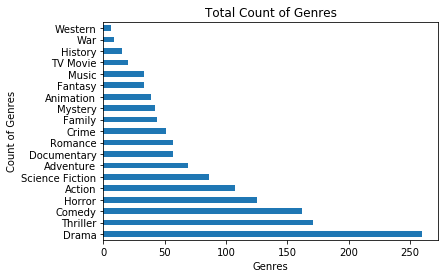

In [41]:
# split 'genre' field to get the counts

dfgenrelist = []
dfcastrecord = []
df_2015 = df[df['release_year'] == 2015]

for i in range(0, len(df_2015)):
    dfgenre = df_2015.iloc[i]["genres"].split("|")
    if dfgenre[0] == "No genres available": # we don't need to count them
        continue
    
    # record each genre
    for x in range(0,len(dfgenre)):
        dfgenrelist.append(dfgenre[x])

# visualize counts of movies by genres in 2015
dfgenres = pd.DataFrame(dfgenrelist,columns=['genres'])

plt.xlabel('Genres')
plt.ylabel('Count of Genres')
plt.title('Total Count of Genres')
dfgenres['genres'].value_counts().plot(kind='barh')

As you can see Drama movies are the most popular genre in 2015

#### 3- Which actors/actress has played at which year most?

* We want to find the movie counts grouped by actors/actress and years
* Like genre, we need to split cast data seperated by '|'. 

In [117]:
df_cast_list = []
df_cast = []
cast_dict ={}

# split cast data and keep them in a dictionary to count them by year
for i in range(0, len(df)):
    df_cast = df.iloc[i]["cast"].split("|")
    if df_cast[0] == "No cast available": # these records are not appended to the final array
        continue
    df_cast = [x + "-" + str(df.iloc[i]["release_year"]) for x in df_cast]
    df_cast_list = np.append(df_cast_list, df_cast)

# get the count of cast-year pairs
unique, counts = np.unique(df_cast_list, return_counts=True)

# create a dictionary from final tuples
cast_dict = dict(zip(unique, counts))

# the dictionary is reversely sorted to get actors/actress played most at a single year at the beginning
cast_dict = sorted(cast_dict.items(), key=lambda x:x[1], reverse=True)

#print top 5 records
for i in range(0,5):
    print(cast_dict[i])

('No cast info available-2014', 12)
('James Franco-2013', 10)
('No cast info available-2011', 8)
('No cast info available-2012', 8)
('No cast info available-2015', 8)


* The result shows us that James Franco has played in 10 movies in 2013 at top

#### 4- Take one of the genres and investigate its population by year.

* Let's find statistics of the Science fiction movies by year
* Like before we need split genres data for each row
* From histogram you can see Science Fiction was popular in 2015 at most.

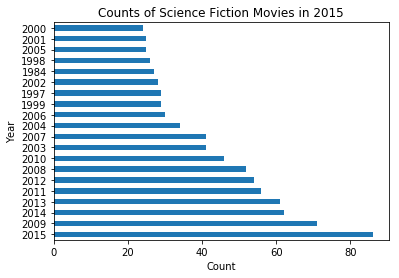

In [42]:
df_genre_list = []

# split genre data 
for i in range(0, len(df)):
    df_genre = df.iloc[i]["genres"].split("|")

    # if the genre is Science Fiction add a reacor which keeps its release_year
    for x in range(0,len(df_genre)):
        if df_genre[x] == 'Science Fiction':            
            df_genre_list.append(df.iloc[i]["release_year"])

# create the dataframe
df_years = pd.DataFrame(df_genre_list,columns=['release_year'])
#print(df_years)

# dataframe is grouped by release_year 
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Counts of Science Fiction Movies in 2015')
df_years['release_year'].value_counts()[:20].plot(kind='barh')

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>We can say that the data is clean in general.</li>
    <li> We just needed to fill null values with a default values:
        <ul>
            <li>"cast" column has 76 NULL values. We fill them with "No cast available"</li>
            <li>"genres" column has 23 NULL values". We fill them with "No genre available"</li>
            <li>"keywords" column has 1493 NULL values". We fill them with "No keywords available"</li>
            <li>"production_companies" column has 1030 NULL values". We fill them with "No production company available"</li>
            <li>"director" column has 44 NULL values". We fill them with "No production company available"</li>
        </ul>
    </li>
    <li>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. We need to parse them before investigating these values </li>
    <li>There is no a direct correlation between Science Movies and years. But these movies are popular in 2015 mostly</li>
    <li>From 2005, number of movies is increasing significantly</li>
    <li>Runtimes of movies are increasing slightly by years</li>
    <li>Woody Allen is the directory woh has the most movies with 45 movies.</li>
    <li>2014 is the year which movies have been released the most.</li>
    <li>In 2015 Drama movies were very popular while Western ones is the least one.</li>
    <li>The actors/actress have maximum 10 movies by year. James Franco has 10 movies in 2013</li>
    <li>Some additional researchs could be interesting on this data set such as:
        <ul>
            <li>Percentage of genres by years</li>
            <li>average budgets per genres</li>
            <li>average budgets per year</li>
            <li>Relation between budgets and popularities</li>
        </ul>
    </li>
</ul>